In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [3]:
data = pd.DataFrame({'weather': weather, 'temp': temp, 'play':play})

data

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


## 날씨와 온도를 input (B)으로 받았을 때 경기 여부 (A)를 예측하는 경우

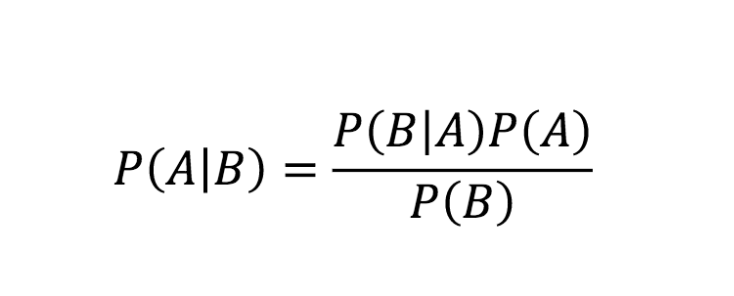

P(A|B)
: 사후확률(posterior). 사건 B가 발생한 후 갱신된 사건 A의 확률

P(B|A)
: 가능도(likelihood). 사건 A가 발생한 경우 사건 B의 확률


P(A)
: 사전확률(prior). 사건 B가 발생하기 전에 가지고 있던 사건 A의 확률

P(B)
: 정규화 상수(normalizing constant) 또는 증거(evidence). 확률의 크기 조정

## 문제 1. 날씨가 overcast일 때 경기를 할 확률은?

$$ P(Yes|Overcast) = \frac{P(Overcast|Yes) P(Yes)}{P(Overcast)} $$

In [4]:
len(data)

14

In [5]:
data[(data['weather'] == 'Overcast') & (data['play'] == 'Yes')] #P(Overcast|Yes) = P(Overcast,Yes) / P(Yes) = 4/9 = 0.44

,weather,temp,play
2,Overcast,Hot,Yes
6,Overcast,Cool,Yes
11,Overcast,Mild,Yes
12,Overcast,Hot,Yes


In [6]:
len(data[(data['weather'] == 'Overcast') & (data['play'] == 'Yes')])

4

In [7]:
data[(data['play'] == 'Yes')] #P(Yes) = 9/14 = 0.64

,weather,temp,play
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
6,Overcast,Cool,Yes
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes
10,Sunny,Mild,Yes
11,Overcast,Mild,Yes
12,Overcast,Hot,Yes


In [8]:
len(data[(data['play'] == 'Yes')])

9

In [9]:
data[data['weather'] == 'Overcast'] # P(Overcast) = 4/14 = 0.29

,weather,temp,play
2,Overcast,Hot,Yes
6,Overcast,Cool,Yes
11,Overcast,Mild,Yes
12,Overcast,Hot,Yes


In [10]:
len(data[data['weather'] == 'Overcast'] )

4

$$ P(Yes|Overcast) = \frac{P(Overcast|Yes) P(Yes)}{P(Overcast)} = \frac{0.44 * 0.64}{0.29} = 0.98$$

## 문제 2. 날씨가 overcast, 기온이 Mild일 때 경기를 할 확률은?

$$ P(Yes | Overcast, Mild) = \frac{P(Overcast, Mild | Yes) P(Yes)}{P(Overcast, Mild)} $$

$$ P(Overcast, Mild | Yes) = P(Overcast|Yes) * P(Mild|Yes) $$

$$ P(Overcast, Mild) = P(Overcast) * P(Mild) $$

In [11]:
data[(data['weather'] == 'Overcast') & (data['play'] == 'Yes')] #P(Overcast|Yes) = 4/9 = 0.44

,weather,temp,play
2,Overcast,Hot,Yes
6,Overcast,Cool,Yes
11,Overcast,Mild,Yes
12,Overcast,Hot,Yes


In [12]:
data[(data['temp'] == 'Mild') & (data['play'] == 'Yes')] #P(Mild|Yes) = 4/9 = 0.44

,weather,temp,play
3,Rainy,Mild,Yes
9,Rainy,Mild,Yes
10,Sunny,Mild,Yes
11,Overcast,Mild,Yes


$$ P(Overcast, Mild | Yes) = P(Overcast|Yes) * P(Mild|Yes) = 0.44 * 0.44 = 0.1936 $$

In [13]:
data[(data['play'] == 'Yes')] #P(Yes) = 9/14 = 0.64

,weather,temp,play
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
6,Overcast,Cool,Yes
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes
10,Sunny,Mild,Yes
11,Overcast,Mild,Yes
12,Overcast,Hot,Yes


In [14]:
data[data['weather'] == 'Overcast'] # P(Overcast) = 4/14

,weather,temp,play
2,Overcast,Hot,Yes
6,Overcast,Cool,Yes
11,Overcast,Mild,Yes
12,Overcast,Hot,Yes


In [15]:
data[data['temp'] == 'Mild'] # P(Mild) = 6/14

,weather,temp,play
3,Rainy,Mild,Yes
7,Sunny,Mild,No
9,Rainy,Mild,Yes
10,Sunny,Mild,Yes
11,Overcast,Mild,Yes
13,Rainy,Mild,No


$$ P(Overcast, Mild) = P(Overcast) * P(Mild) = (4/14) * (6/14) = 0.1224$$

$$ P(Yes | Overcast, Mild) = \frac{P(Overcast, Mild | Yes) P(Yes)}{P(Overcast, Mild)} = \frac{0.1936 * 0.64}{0.1224} = 1 $$

## Categorical variable은 BernoulliNB와 MultinomialNB로 예측

In [16]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

## Continuous variable


In [17]:
from sklearn.naive_bayes import GaussianNB

## IRIS data

In [18]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.DataFrame(iris.target, columns =['target'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)

In [20]:
model = GaussianNB()
model.fit(X_train, y_train)

C:\Users\qwan9\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [21]:
model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [22]:
model.predict(X_test)[:1]

array([1])

In [23]:
y_test[:1]

,target
73,1


In [24]:
model.predict_proba(X_test)[:1]

array([[5.97327448e-90, 9.95635767e-01, 4.36423302e-03]])

In [25]:
pred_test = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_test)

1.0

# AUROC(Area Under ROC Curve), ROC_AUC, AUC

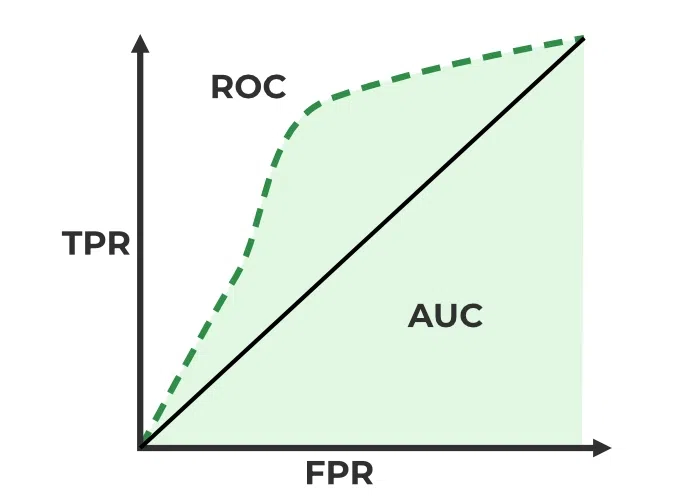

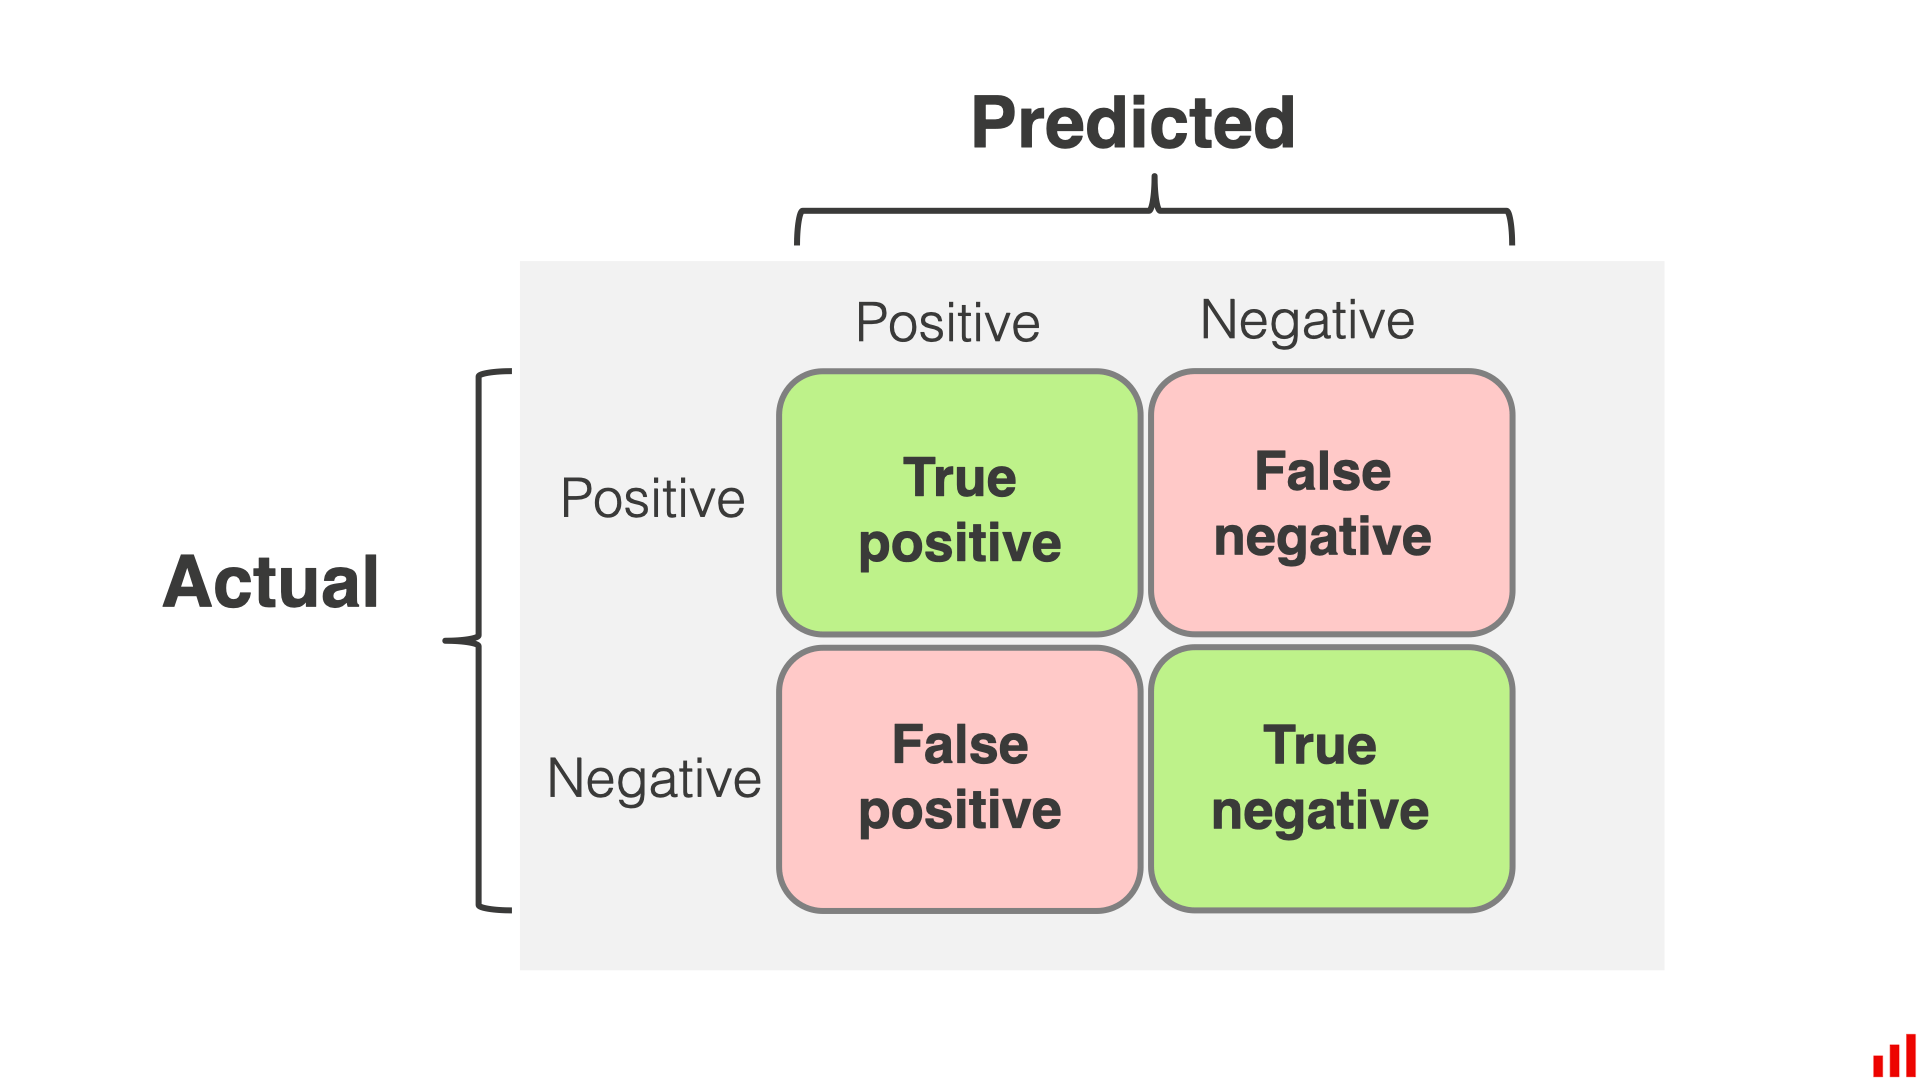
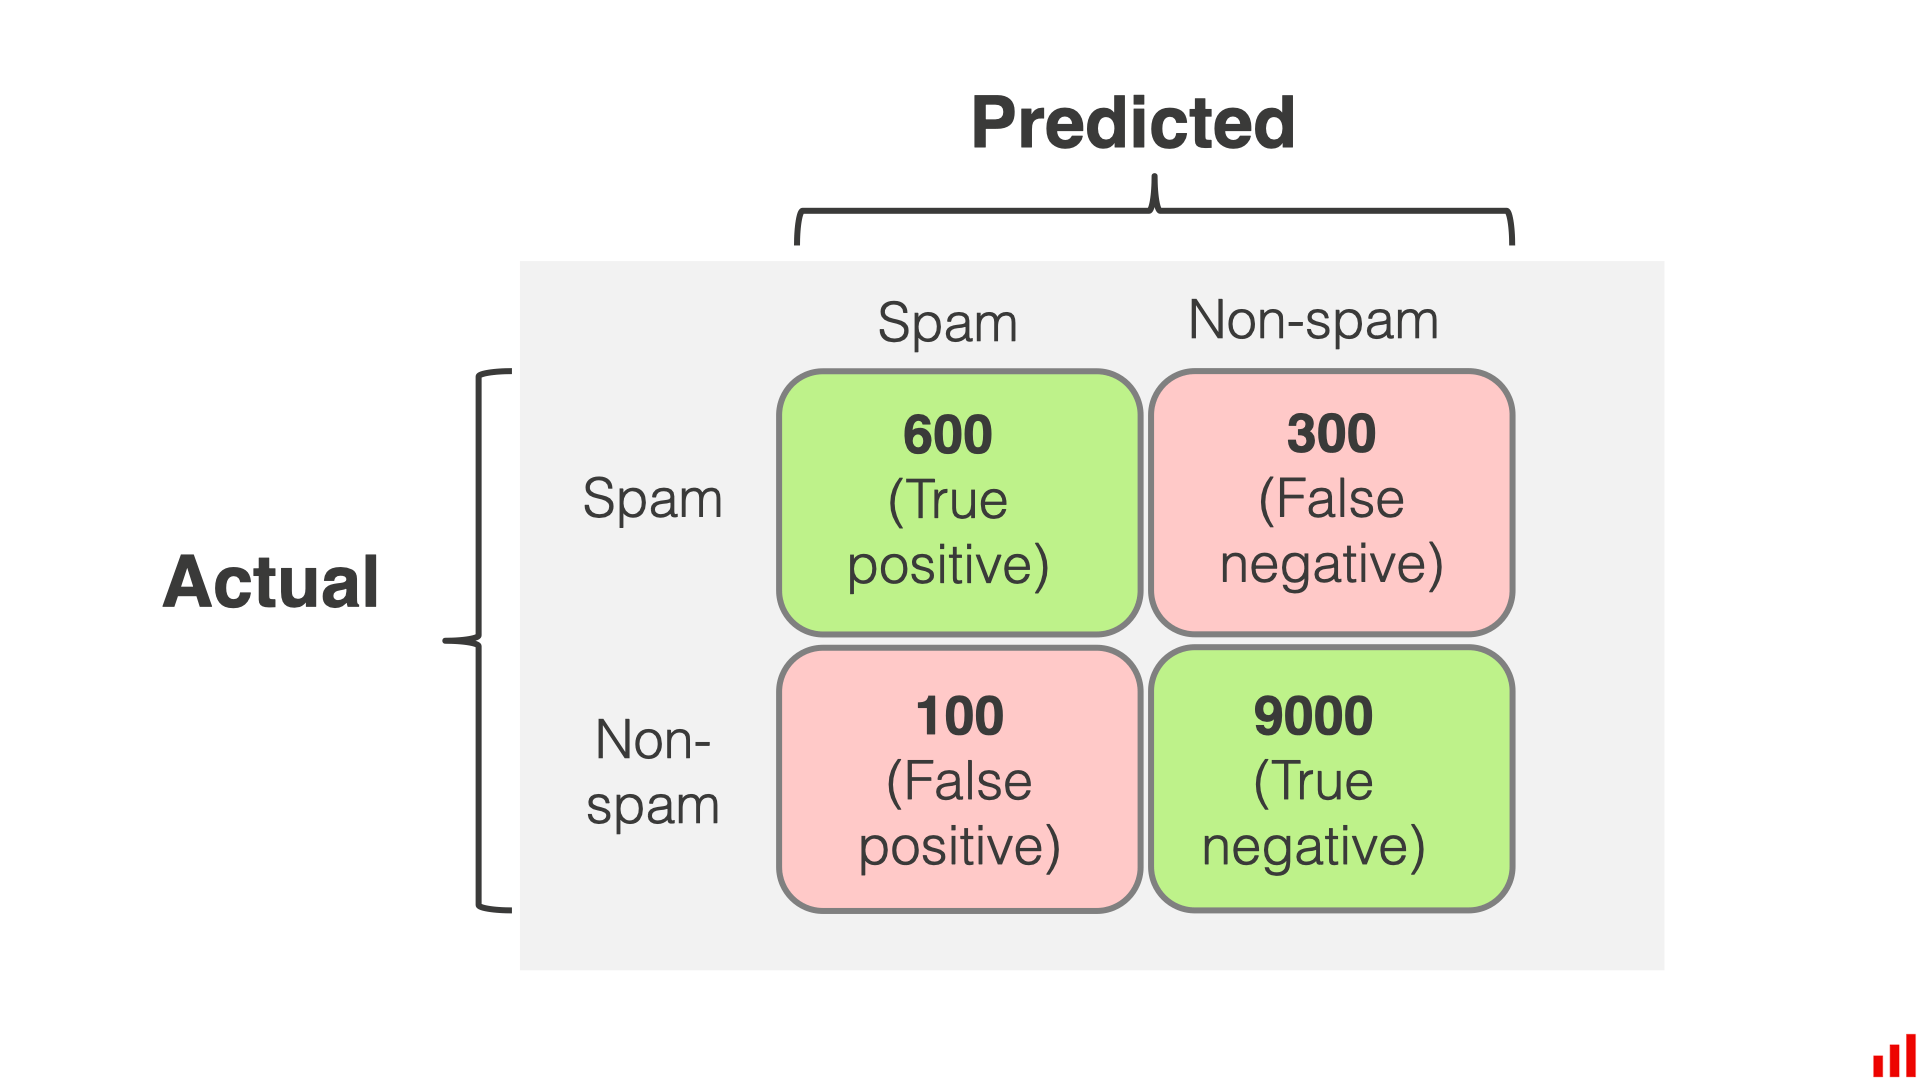
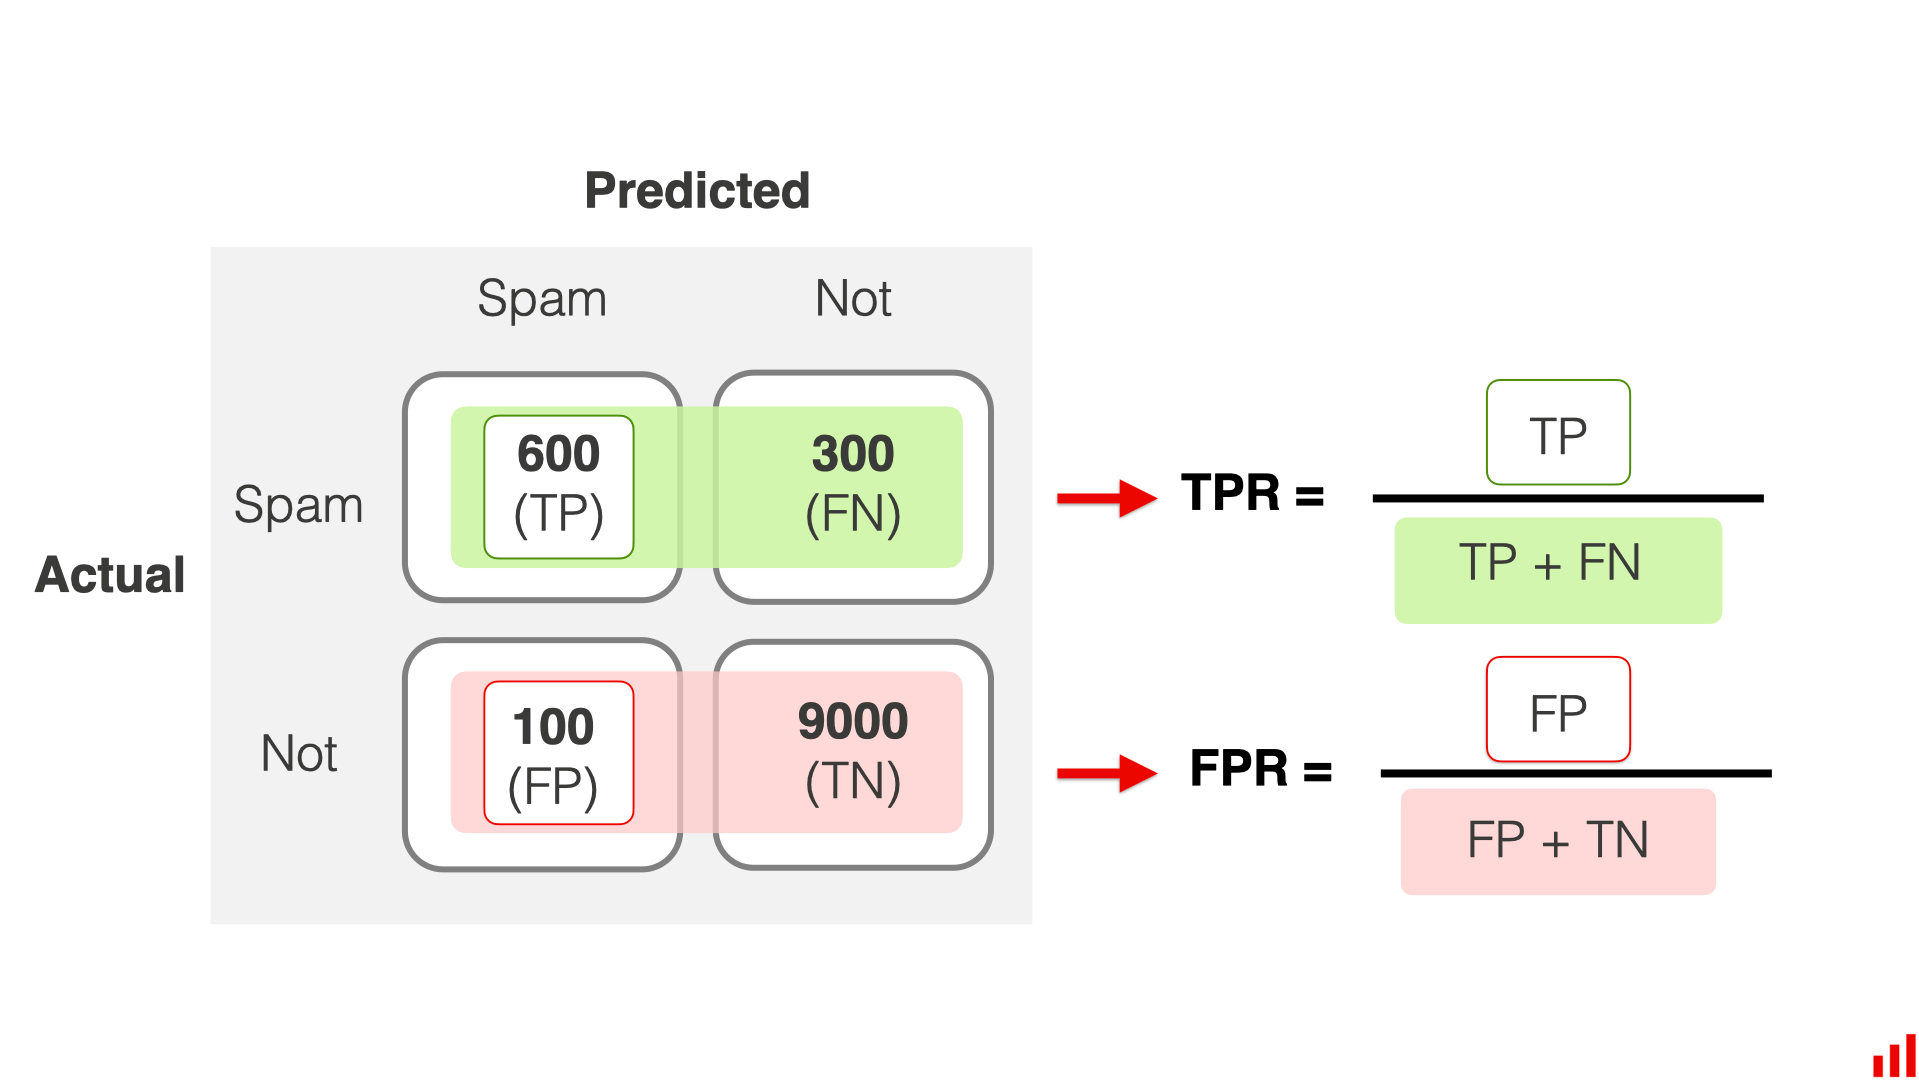
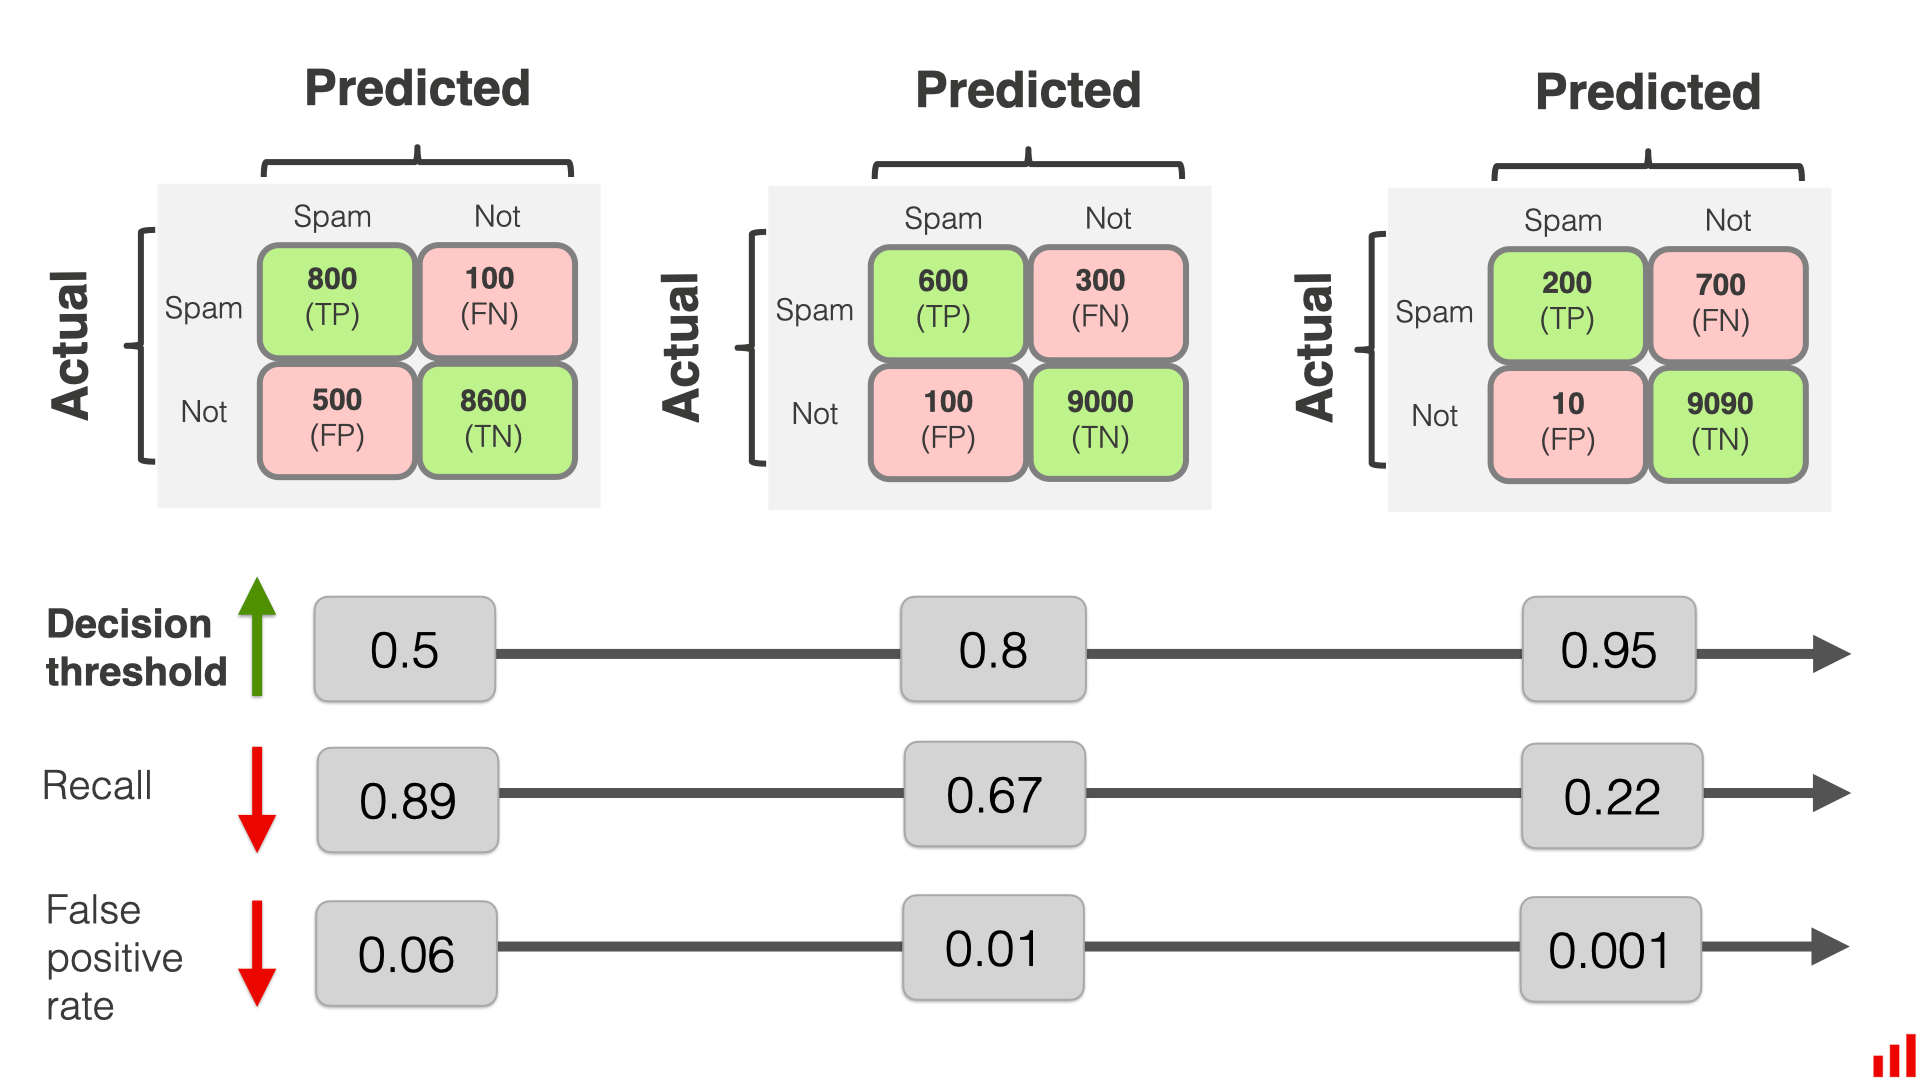

In [27]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 300, n_features=4, n_informative=2, n_redundant=0, random_state=123)

In [28]:
data = pd.DataFrame(X, columns = ['feature1', 'feature2', 'feature3', 'feature4'])
data['class']=y
data

,feature1,feature2,feature3,feature4,class
0,-1.109231,1.265008,0.050222,-0.988690,1
1,-0.128452,0.411951,0.261273,0.896187,0
2,-0.314251,-0.685366,0.959830,0.972684,0
3,-0.158605,-0.882871,0.371525,-1.306118,0
4,0.772046,-2.160996,-0.202753,1.717405,0
...,...,...,...,...,...
295,-1.186887,3.079418,-0.616971,-0.689392,1
296,1.045857,-1.685586,-0.473355,0.064855,0
297,-1.229969,-1.015939,-1.863884,1.088178,0
298,-2.104928,-0.828573,1.042335,-1.579896,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(data[['feature1', 'feature2', 'feature3', 'feature4']], data['class'],test_size=0.2, random_state = 42)
clf = GaussianNB().fit(X_train,y_train)
pred = clf.predict(X_test)

In [30]:
clf.predict_proba(X_test)

array([[2.36539388e-01, 7.63460612e-01],
       [9.22699456e-01, 7.73005441e-02],
       [5.96605273e-04, 9.99403395e-01],
       [9.71746804e-01, 2.82531958e-02],
       [8.77954637e-01, 1.22045363e-01],
       [9.98881323e-01, 1.11867727e-03],
       [1.30196675e-02, 9.86980333e-01],
       [9.99797891e-01, 2.02108930e-04],
       [3.78280021e-01, 6.21719979e-01],
       [9.80292058e-01, 1.97079422e-02],
       [7.71757435e-01, 2.28242565e-01],
       [7.91335912e-04, 9.99208664e-01],
       [9.98757771e-01, 1.24222878e-03],
       [1.21737290e-01, 8.78262710e-01],
       [9.99928461e-01, 7.15392558e-05],
       [2.12554142e-02, 9.78744586e-01],
       [9.76347493e-01, 2.36525069e-02],
       [3.21855733e-03, 9.96781443e-01],
       [1.56001937e-03, 9.98439981e-01],
       [5.40303684e-03, 9.94596963e-01],
       [6.09981038e-02, 9.39001896e-01],
       [9.96829586e-01, 3.17041386e-03],
       [6.64674168e-01, 3.35325832e-01],
       [3.39132329e-01, 6.60867671e-01],
       [5.803946

In [31]:
pred

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0])

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_test, pred)

array([[26,  4],
       [ 5, 25]], dtype=int64)

In [34]:
pd.DataFrame(confusion_matrix(y_test, pred), index = ['Actual 0','Actual 1'], columns = ['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,26,4
Actual 1,5,25


In [35]:
clf.predict_proba(X_test)[:,1]

array([7.63460612e-01, 7.73005441e-02, 9.99403395e-01, 2.82531958e-02,
       1.22045363e-01, 1.11867727e-03, 9.86980333e-01, 2.02108930e-04,
       6.21719979e-01, 1.97079422e-02, 2.28242565e-01, 9.99208664e-01,
       1.24222878e-03, 8.78262710e-01, 7.15392558e-05, 9.78744586e-01,
       2.36525069e-02, 9.96781443e-01, 9.98439981e-01, 9.94596963e-01,
       9.39001896e-01, 3.17041386e-03, 3.35325832e-01, 6.60867671e-01,
       4.19605383e-01, 3.68573306e-02, 9.89823345e-01, 9.99751889e-01,
       1.07597461e-02, 9.95184834e-01, 3.16044352e-04, 9.16836876e-03,
       6.87781554e-01, 8.53304379e-01, 9.78556802e-01, 6.03411340e-01,
       9.61741203e-01, 6.13060537e-01, 9.99438679e-01, 1.14322972e-02,
       5.82473716e-01, 3.35490055e-03, 1.71816117e-01, 9.74711469e-01,
       4.33699142e-02, 7.25714511e-01, 2.28895659e-02, 2.33894450e-03,
       4.64851272e-01, 4.35980482e-01, 8.89561924e-01, 9.40272748e-01,
       7.74114510e-01, 5.00309728e-02, 6.40294169e-02, 1.72224261e-01,
      

In [36]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.03333333, 0.03333333,
        0.06666667, 0.06666667, 0.13333333, 0.13333333, 0.16666667,
        0.16666667, 0.26666667, 0.26666667, 1.        ]),
 array([0.        , 0.03333333, 0.6       , 0.6       , 0.73333333,
        0.73333333, 0.8       , 0.8       , 0.93333333, 0.93333333,
        0.96666667, 0.96666667, 1.        , 1.        ]),
 array([1.99975189e+00, 9.99751889e-01, 8.89561924e-01, 8.78262710e-01,
        7.25714511e-01, 6.87781554e-01, 6.21719979e-01, 6.03411340e-01,
        4.19605383e-01, 3.35325832e-01, 2.28242565e-01, 1.22045363e-01,
        7.73005441e-02, 7.15392558e-05]))

In [37]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9588888888888889

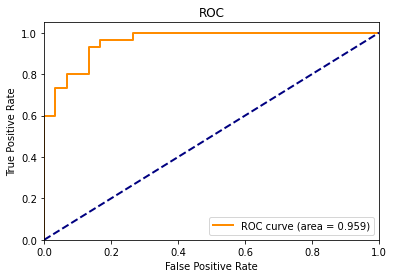

In [38]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.3f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()